##Recurrent Neural Network

Part 1 - Data Preprocessing

Importing the library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Training set

In [7]:
data_train = pd.read_csv("C:\\Users\\ANJALI\\Desktop\\StockPrediction\\Stock_Data\\Train.csv")
data_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [8]:
training_set = data_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

Feature Scaling


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set.shape

(1258, 1)

Creating a data structure with 60 timesteps and 1 output

In [11]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

Reshaping

In [15]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

Part 2 - Building and training the RNN

Importing the keras libraries and packages

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initialising the RNN

In [18]:
regressor  = Sequential()

Adding the first LSTM layer and some Dropout regularization

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Adding the second LSTM layer and some Dropout regularization

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding the third LSTM layer and some Dropout regularization

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding the fourth LSTM layer and some Dropout regularization

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding output layer

In [23]:
regressor.add(Dense(units = 1))

Compiling the RNN

In [24]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting the RNN to the training set

In [25]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 74ms/step - loss: 0.0383
Epoch 2/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0043
Epoch 13/100
38/38 [=====

In [26]:
y_pred_train = regressor.predict(X_train)
y_pred_train

38/38 [==============================] - 2s 22ms/step


array([[0.07200606],
       [0.07434067],
       [0.07598743],
       ...,
       [0.9616804 ],
       [0.96201086],
       [0.96020925]], dtype=float32)

Evaluating the RNN

In [27]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train,y_pred_train))
rmse

0.025032738107754617

Part 3 - Making predictions and Visualizing the results

Getting the real stock price of 2017

In [28]:
data_test = pd.read_csv("C:\\Users\\ANJALI\\Desktop\\StockPrediction\\Stock_Data\\Test.csv")
new_data= data_test.iloc[:, 1:2].values

Getting the predicted stock price of 2017

In [29]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs  = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_stock_price = regressor.predict(X_test)
pred_stock_price = sc.inverse_transform(pred_stock_price)

1/1 [==============================] - 0s 43ms/step


Visualizing the results

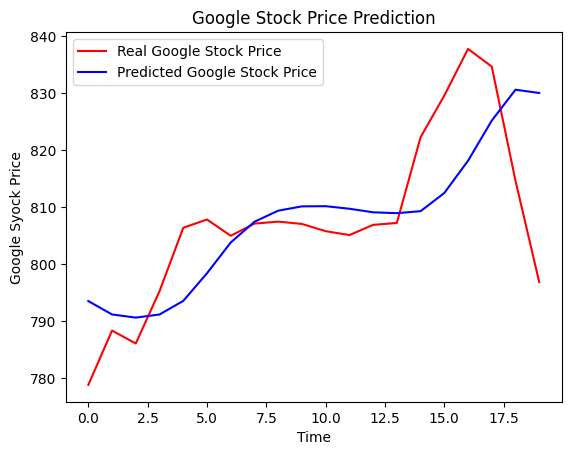

In [30]:
plt.plot(new_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred_stock_price, color = 'blue',label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Syock Price')
plt.legend()
plt.show()